<a href="https://colab.research.google.com/github/babyraggge/time-data-prediction-methods/blob/main/practice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы прогнозирования временного ряда

Бельтюков Михаил

РИ-481223

Вариант 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy.stats as stats
import statsmodels.api as sm

from statsmodels.tsa import api as tsa
from statsmodels.tsa.arima_model import ARIMA

from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Создадим временной ряд на основе следующих данных:

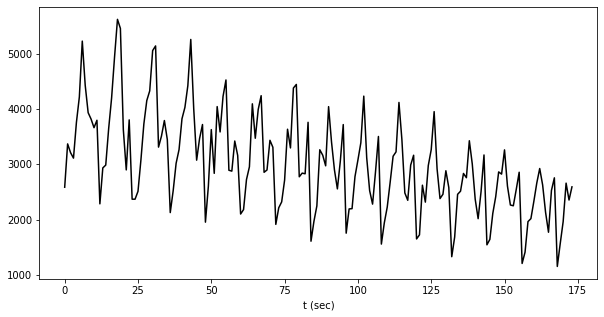

In [2]:
file = h5py.File('Fort.mat', 'r')
data = file.get('Fort')
Fort = np.array(data)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k')
plt.xlabel('t (sec)')
plt.show();

Произведем ретроспективный прогноз. Для этого отрежем от данного ряда
последние 24 точки, которые будем прогнозировать:

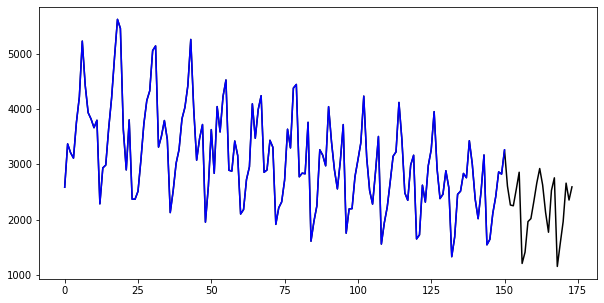

In [3]:
Z = Fort[:len(Fort)-24+1] # отрезаем последние 24 точки
t = np.arange(0, len(Z), 1) # временная шкала для регрессии
t = t.reshape(-1,1)
plt.figure(figsize = (10, 5))
plt.plot(Fort, 'k') # исходный ВР
plt.plot(t, Z, 'b') # урезанный ряд
plt.show()

Построим регрессионную
модель тренда первого, второго и третьего порядка. Для прогноза по методу регрессии используем готовые
библиотеки:

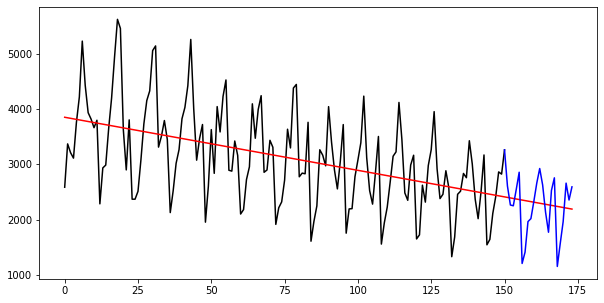

In [4]:
t = np.arange(0, len(Z), 1) # диапазон урезанного ряда
t = t.reshape(-1,1)

t0 = np.arange(0, len(Fort), 1) # диапазон полного ряда
t0 = t0.reshape(-1,1)

reg = LinearRegression().fit(t, Z) # модель регрессии
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, reg.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

Напрямую через МНК библиотеки statsmodels:

[3849.23884629   -9.58949808]


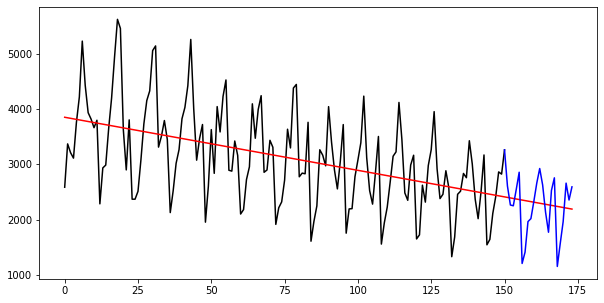

In [5]:
x_ = sm.add_constant(t)
smm = sm.OLS(Z, x_)
res = smm.fit() # строим модель регрессии
print(res.params)
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, res.predict(sm.add_constant(t0)), 'r') # строим прогноз
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

 Через полиномиальные кривые polyfit:

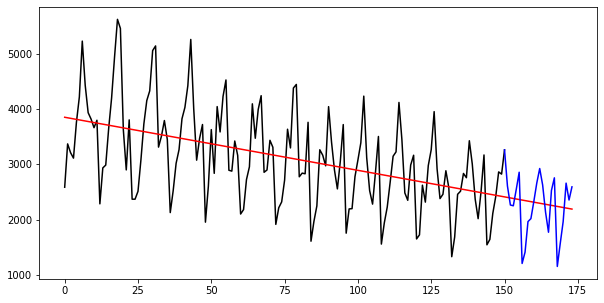

In [6]:
bb = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 1)
p = np.poly1d(bb) # создаем экземпляр полинома
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p(t0), 'r') # полином на прогнозной временной сетке
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Через подгонку функций библиотеки scipy.optimize:

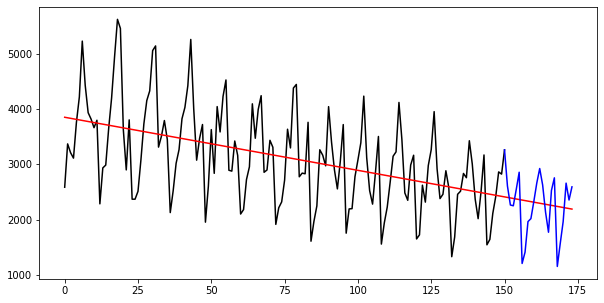

In [7]:
popt, pcov = curve_fit(lambda t, b0, b1: b0 + b1 * t, 
                       t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Аналогично для регрессионной кривой второго порядка:

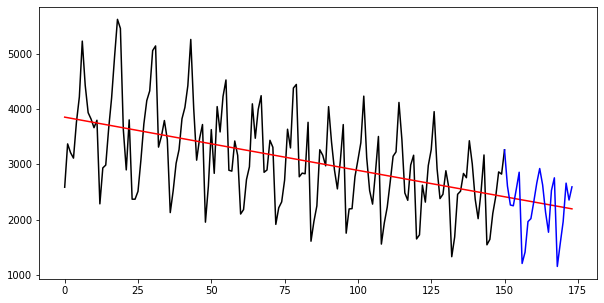

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polyreg2_Pipeline = Pipeline([('pf', PolynomialFeatures(2)),
                              ('lr', LinearRegression())])
polyreg2_Pipeline.fit(t, Z)

plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, polyreg2_Pipeline.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

Через полиномиальные кривые polyfit:

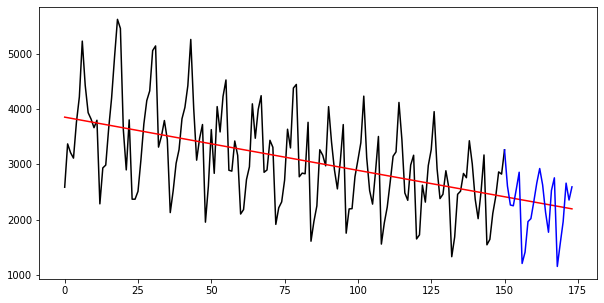

In [9]:
bb2 = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 2) # полиномиальная кривая 2-го порядка
p2 = np.poly1d(bb2)

plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p2(t0), 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Через подгонку функций библиотеки scipy.optimize:

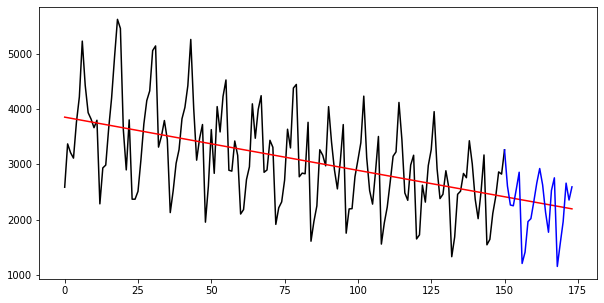

In [10]:
popt2, pcov2 = curve_fit(lambda t, b0, b1, b2: b0 + b1 * t + b2 *t * t, 
                         t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Аналогично для регрессионной кривой третьего порядка:

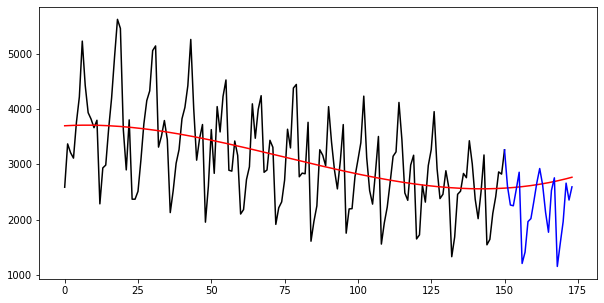

In [11]:
polyreg3_Pipeline = Pipeline([('pf', PolynomialFeatures(3)),
                              ('lr', LinearRegression())])
polyreg3_Pipeline.fit(t, Z)

plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, polyreg3_Pipeline.predict(t0), 'r') # прогноз на весь диапазон
plt.plot(t0[-24:], Fort[-24:], 'b') # реальные прогнозные значения
plt.show()

Через полиномиальные кривые polyfit:

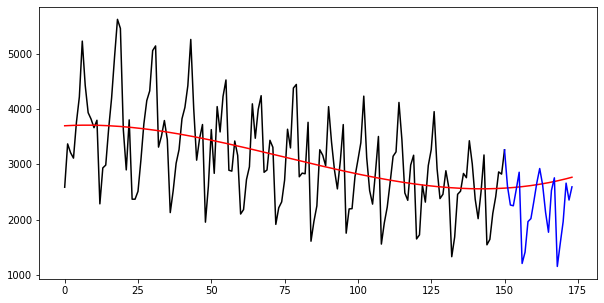

In [12]:
bb3 = np.polyfit(t.reshape(1,-1)[0], Z.reshape(1,-1)[0], 3) # полиномиальная кривая 3-го порядка
p3 = np.poly1d(bb3)

plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, p3(t0), 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Через подгонку функций библиотеки scipy.optimize:

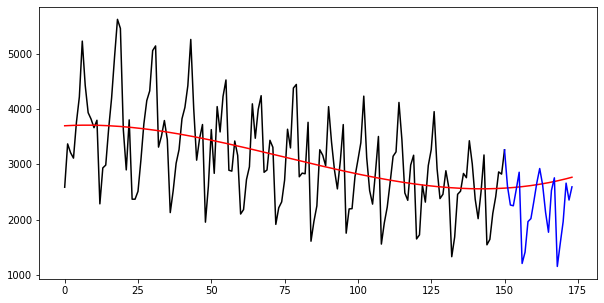

In [13]:
popt3, pcov3 = curve_fit(lambda t, b0, b1, b2, b3: b0 + b1 * t + b2 *t * t + b3 *t *t *t, 
                         t.reshape(1,-1)[0], Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Как можно заметить, визуально все результаты одинаковые. Проведем оценку точность каждого из получившихся прогнозов с
помощью ряда оценок. Напишим для этого специальную функцию:

In [14]:
# Средняя ошибка прогноза
def MAE(pred, real):
  return np.mean(np.abs(pred - real))

# СКВО прогноза
def MSD(pred, real):
  return np.sqrt(np.mean((pred - real)**2))

# Средняя ошибка аппроксимации
def MAPE(pred, real):
  return np.mean(np.abs((real - pred) / real))
  # return np.mean(np.abs(pred - real) / pred)

# Коэффициент несоответствия 1
def MF1(pred, real):
  return np.sqrt(np.sum((real - pred)**2) / np.sum(pred**2))

# Коэффициент несоответствия 2
def MF2(pred, real):
  return np.sqrt(np.sum((real - pred)**2) / (np.sum((real.mean() - pred)**2)))

def res_evaluation(pred, real, title=""):
  print(
      f"Оценка точности прогноза {title}\n"
      f"Средняя ошибка прогноза: {np.round(MAE(pred, real),2)}\n",
      f"СКВО прогноза: {np.round(MSD(pred, real),2)}\n",
      f"Средняя ошибка аппроксимации: {np.round(MAPE(pred, real),2) *100}%\n",
      f"Коэффициент несоответствия 1: {np.round(MF1(pred, real),2)}\n",
      f"Коэффициент несоответствия 2: {np.round(MF2(pred, real),2)}"
      )

Точность прогноза на основе линейной регресии первого порядка:

In [15]:
  res_evaluation(reg.predict(t0[-24:]), Fort[-24:], title='(библиотека sklearn)')

Оценка точности прогноза (библиотека sklearn)
Средняя ошибка прогноза: 437.02
 СКВО прогноза: 531.28
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.13


In [16]:
res_evaluation(res.predict(sm.add_constant(t0[-24:])), Fort[-24:], title='(МНК библиотеки statsmodels)')

Оценка точности прогноза (МНК библиотеки statsmodels)
Средняя ошибка прогноза: 436.53
 СКВО прогноза: 541.47
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 1.15
 Коэффициент несоответствия 2: 35.58


In [17]:
res_evaluation(p(t0[-24:]), Fort[-24:], title='(полиномиальные кривые polyfit)')

Оценка точности прогноза (полиномиальные кривые polyfit)
Средняя ошибка прогноза: 437.02
 СКВО прогноза: 531.28
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.13


In [18]:
res_evaluation(t0[-24:]*popt[1]+popt[0], Fort[-24:], title='(подгонку функций библиотеки scipy.optimize)')

Оценка точности прогноза (подгонку функций библиотеки scipy.optimize)
Средняя ошибка прогноза: 437.02
 СКВО прогноза: 531.28
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.13


Точность прогноза на основе линейной регресии второго порядка:

In [19]:
res_evaluation(polyreg2_Pipeline.predict(t0[-24:]), Fort[-24:], title='(библиотека sklearn)')

Оценка точности прогноза (библиотека sklearn)
Средняя ошибка прогноза: 436.7
 СКВО прогноза: 531.51
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.04


In [20]:
res_evaluation(p2(t0[-24:]), Fort[-24:], title='(полиномиальные кривые polyfit)')

Оценка точности прогноза (полиномиальные кривые polyfit)
Средняя ошибка прогноза: 436.7
 СКВО прогноза: 531.51
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.04


In [21]:
res_evaluation(t0[-24:]*t0[-24:]*popt2[2]+t0[-24:]*popt2[1]+popt2[0], Fort[-24:], title='(подгонку функций библиотеки scipy.optimize)')

Оценка точности прогноза (подгонку функций библиотеки scipy.optimize)
Средняя ошибка прогноза: 436.7
 СКВО прогноза: 531.51
 Средняя ошибка аппроксимации: 24.0%
 Коэффициент несоответствия 1: 0.23
 Коэффициент несоответствия 2: 7.04


Точность прогноза на основе линейной регресии третьего порядка:

In [22]:
res_evaluation(polyreg3_Pipeline.predict(t0[-24:]), Fort[-24:], title='(библиотека sklearn)')

Оценка точности прогноза (библиотека sklearn)
Средняя ошибка прогноза: 494.11
 СКВО прогноза: 665.01
 Средняя ошибка аппроксимации: 28.999999999999996%
 Коэффициент несоответствия 1: 0.25
 Коэффициент несоответствия 2: 1.73


In [23]:
res_evaluation(p3(t0[-24:]), Fort[-24:], title='(полиномиальные кривые polyfit)')

Оценка точности прогноза (полиномиальные кривые polyfit)
Средняя ошибка прогноза: 494.11
 СКВО прогноза: 665.01
 Средняя ошибка аппроксимации: 28.999999999999996%
 Коэффициент несоответствия 1: 0.25
 Коэффициент несоответствия 2: 1.73


In [24]:
res_evaluation(t0[-24:]*t0[-24:]*t0[-24:]*popt3[3]+t0[-24:]*t0[-24:]*popt3[2]+t0[-24:]*popt3[1]+popt3[0],
               Fort[-24:], title='(подгонку функций библиотеки scipy.optimize)')

Оценка точности прогноза (подгонку функций библиотеки scipy.optimize)
Средняя ошибка прогноза: 494.11
 СКВО прогноза: 665.01
 Средняя ошибка аппроксимации: 28.999999999999996%
 Коэффициент несоответствия 1: 0.25
 Коэффициент несоответствия 2: 1.73


Построим доверительные интервалы для тренда первого порядка:

In [25]:
def S(pred, real):
  return np.sqrt((np.sum((real-pred)**2))/(real.shape[0])-2)

def delta1(pred, real):
  return 1.96 * S(pred, real) * np.sqrt(1 + 1/real.shape[0] + (((pred-pred.mean())**2)/(np.sum((pred-pred.mean())**2))))

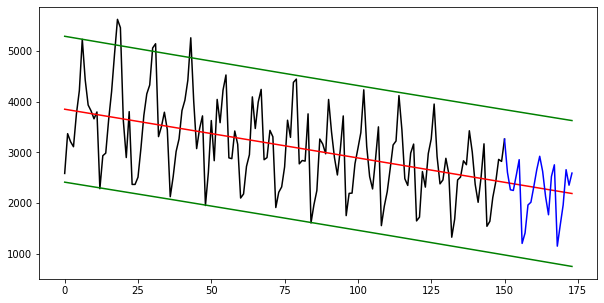

In [26]:
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*popt[1]+popt[0], 'r')
plt.plot(t0, t0*popt[1]+popt[0]+delta1(t0*popt[1]+popt[0], Fort), 'g')
plt.plot(t0, t0*popt[1]+popt[0]-delta1(t0*popt[1]+popt[0], Fort), 'g')

plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Построим доверительные интервалы для тренда второго порядка:

In [27]:
def delta23(pred, real):
  return 1.96 * np.sqrt(np.sum((pred-real)**2)/real.shape[0])

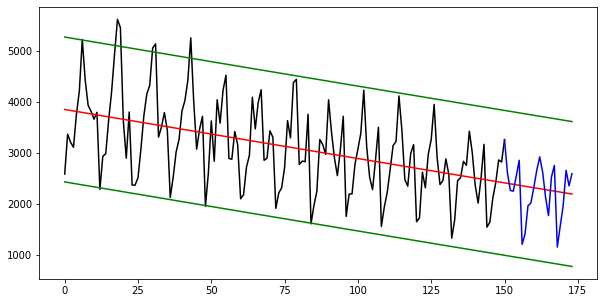

In [28]:
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0], 'r')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0]+delta23(t0*t0*popt2[2]+t0*popt2[1]+popt2[0], Fort), 'g')
plt.plot(t0, t0*t0*popt2[2]+t0*popt2[1]+popt2[0]-delta23(t0*t0*popt2[2]+t0*popt2[1]+popt2[0], Fort), 'g')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Построим доверительные интервалы для тренда третьего порядка:

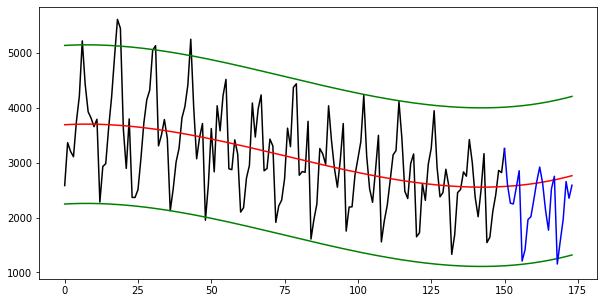

In [29]:
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], 'r')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0]+delta23(t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], Fort), 'g')
plt.plot(t0, t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0]-delta23(t0*t0*t0*popt3[3]+t0*t0*popt3[2]+t0*popt3[1]+popt3[0], Fort), 'g')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Подберем параметрическую  кривую,  которая  давала  бы  более  высокую точность, нежели простые линейные регрессионные кривые. В качестве такой кривой выбираем композицию линейной и периодической кривой.

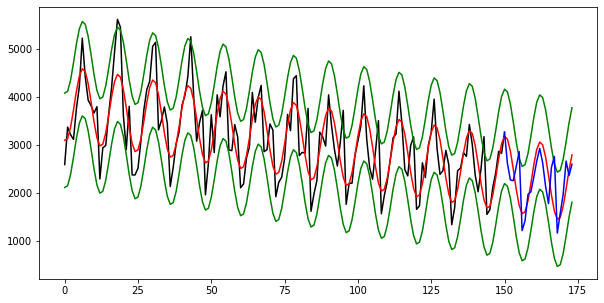

In [30]:
def func(t, a, b, c, d):
  return a*t + b*np.sin(np.pi/6*t + c) + d

popt, pcov = curve_fit(func, 
                       t.reshape(1,-1)[0], 
                       Z.reshape(1,-1)[0])
plt.figure(figsize = (10, 5))
plt.plot(t, Z, 'k')
plt.plot(t0, func(t0,*popt), 'r')
plt.plot(t0, func(t0,*popt)+delta23(func(t0,*popt), Fort), 'g')
plt.plot(t0, func(t0,*popt)-delta23(func(t0,*popt), Fort), 'g')
plt.plot(t0[-24:], Fort[-24:], 'b')
plt.show()

Оценка точности прогноза оказалась выше, чем в предыдущих случаях:

In [31]:
res_evaluation(func(t0[-24:],*popt), Fort[-24:])

Оценка точности прогноза 
Средняя ошибка прогноза: 388.93
 СКВО прогноза: 481.81
 Средняя ошибка аппроксимации: 17.0%
 Коэффициент несоответствия 1: 0.2
 Коэффициент несоответствия 2: 0.85
